In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
# Create a path to the csv and read it into a Pandas DataFrame
csv_path = "deaths.csv"
df = pd.read_csv(csv_path)

df.head()

C:\Users\zaner\AppData\Local\Temp\ipykernel_19488\4100298302.py:3: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,Footnote
0,11/24/2021,01-01-2020,11/20/2021,By Total,NaN,NaN,United States,All Sexes,All Ages,"7,73,812","62,94,875","6,95,560","3,99,005","9,451",NaN
1,11/24/2021,01-01-2020,11/20/2021,By Total,NaN,NaN,United States,All Sexes,Under 1 year,151,"35,550",391,19,23,NaN
2,11/24/2021,01-01-2020,11/20/2021,By Total,NaN,NaN,United States,All Sexes,0-17 years,621,"62,999","1,132",170,189,NaN
3,11/24/2021,01-01-2020,11/20/2021,By Total,NaN,NaN,United States,All Sexes,1-4 years,68,"6,606",224,19,65,NaN
4,11/24/2021,01-01-2020,11/20/2021,By Total,NaN,NaN,United States,All Sexes,5-14 years,199,"10,500",330,65,80,NaN


In [3]:
df['Start Date'] = pd.to_datetime(df['Start Date'])
#01/02/2021 12:00:00 AM

In [4]:
femalelocation_df = df.loc[df["Sex"] == "Male"]
malelocation_df = df.loc[df["Sex"] == "Female"]

In [5]:
female_df = femalelocation_df.loc[df["Age Group"] == "All Ages"]
male_df = malelocation_df.loc[df["Age Group"] == "All Ages"]

In [6]:
female_df1 = female_df.loc[df["State"] == "United States"]
male_df1 = male_df.loc[df["State"] == "United States"]

In [7]:
male_df1['COVID-19 Deaths'] = male_df1['COVID-19 Deaths'].str.replace(",","").astype(int)
female_df1['COVID-19 Deaths'] = female_df1['COVID-19 Deaths'].str.replace(",","").astype(int)

C:\Users\zaner\AppData\Local\Temp\ipykernel_19488\65167082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_df1['COVID-19 Deaths'] = male_df1['COVID-19 Deaths'].str.replace(",","").astype(int)
C:\Users\zaner\AppData\Local\Temp\ipykernel_19488\65167082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_df1['COVID-19 Deaths'] = female_df1['COVID-19 Deaths'].str.replace(",","").astype(int)


In [8]:
#female_df1 = female_df1[['Month', 'COVID-19 Deaths']]
#male_df1 = female_df1[['Month', 'COVID-19 Deaths']]
female_df1 = female_df1[['Start Date', 'COVID-19 Deaths']]
male_df1 = male_df1[['Start Date', 'COVID-19 Deaths']]

In [9]:
male_df1.columns = male_df1.columns.str.replace('COVID-19 Deaths', 'COVID_Deaths')
female_df1.columns = female_df1.columns.str.replace('COVID-19 Deaths', 'COVID_Deaths')
male_df1.columns = male_df1.columns.str.replace('Start Date', 'Start_Date')
female_df1.columns = female_df1.columns.str.replace('Start Date', 'Start_Date')

In [10]:
male_df1 = male_df1[3:]
female_df1 = female_df1[3:]

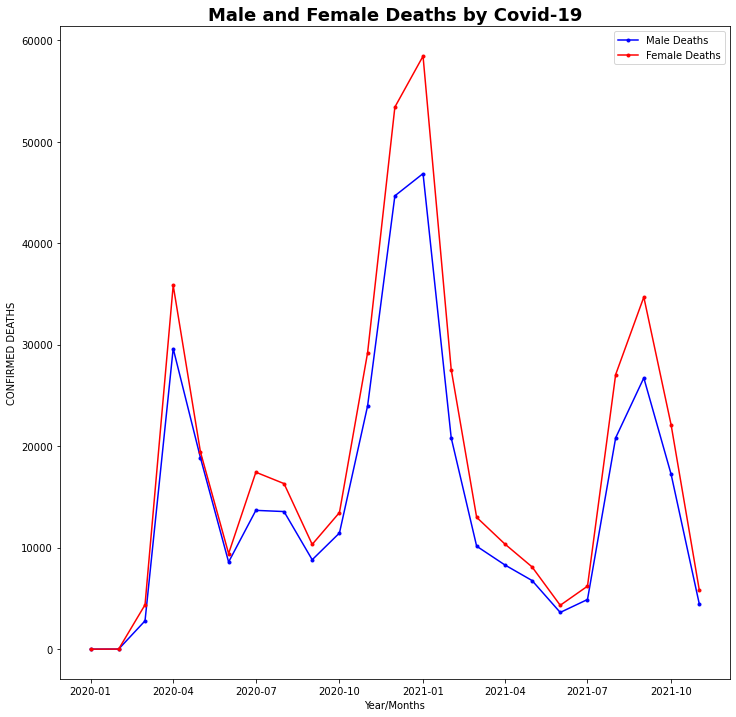

In [20]:

 

plt.figure(figsize=(12,12))
plt.title('Male and Female Deaths by Covid-19', fontdict={'fontweight':'bold', 'fontsize': 18})
plot1, = plt.plot(male_df1.Start_Date, male_df1.COVID_Deaths, 'b.-', label='Male Deaths')
plot2, = plt.plot(female_df1.Start_Date, female_df1.COVID_Deaths, 'r.-', label='Female Deaths')

plt.xlabel('Year/Months')

plt.ylabel('CONFIRMED DEATHS')

plt.savefig('Male_AND_FEMALE_Deaths.jpeg', dpi=300)
#plt.ylim(2000000, 140000000)
plt.legend()
plt.show()

<AxesSubplot:>

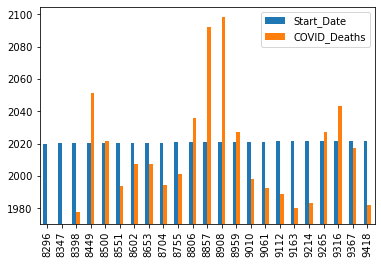

In [13]:

female_df1

,Start_Date,COVID_Deaths
8279,2020-01-01,2
8330,2020-02-01,10
8381,2020-03-01,4370
8432,2020-04-01,35856
8483,2020-05-01,19435
8534,2020-06-01,9420
8585,2020-07-01,17437
8636,2020-08-01,16317
8687,2020-09-01,10326
8738,2020-10-01,13464
